<h2><b>Spotify Most Streamed Songs</b></h2>

This Jupyter Notebook was created based on a initial study's cicle of Data Science
and has as the main objective analyze the 'Spotify Most Streamed Songs' dataset 
using Python CSV reader and Matplotlib library.

In [57]:
# Here we will use the pandas library to acess the dataset 

import pandas as pd

reader = pd.read_csv("archive/Spotify Most Streamed Songs.csv")

In [58]:
# Here we will use the csv library to acess the dataset 

import csv

path = "archive/Spotify Most Streamed Songs.csv"

with open(path, newline= '') as csvfile:
    reader = csv.reader(csvfile)
    

In [59]:
# In this step we are going to use csv as the main library and using a DictReader 

with open(path, newline= '') as csvfile:
    reader = csv.DictReader(csvfile)
    
    fields = []
    fields = next(reader) # Take the heads of each column

    data_list = []  # Create a dictionary to acess the informations by keys
    for row in reader:
        data_list.append(row)


<h3><b> Basic statistical analysis </b></h3>

<lo>
<li> Most Streamed song </li>
<li> Stream's Medium </li>
<li> Stream's Mean </li>
<li> Stream's Mode </li>
</lo>


In [60]:
# Now we can use the dictionary to find the most streamed song, mean, medium and mode 

count_sum = 0
count_best = 0
best_name = ''
count_medium = 0
count_mean = []
count_mode = []
size = len(data_list)

# Let's calculate the total sum, best and medium of streams 

for v in range(size):
        
    value = data_list[v]['streams']

    text_problem = 'abcdefghijklmnopqrstuvwxyz'
    
    for i in range(len(text_problem)):
        if(text_problem[i] in value):
            break
        
        else:
            count_sum += int(value)

            count_mean.append(int(value))
            count_mode.append(int(value))

            if(int(value) > count_best):
                count_best = int(value)
                best_name = data_list[v]['track_name']
            
            break

count_medium = count_sum/size


In [61]:
print('The Most Streamed Song has',format(int(count_best), ',').replace(',', '.'), 'streams and is called',best_name)
print('The Streams Medium is', format(int(count_medium), ',').replace(',', '.'),'billions')

The Most Streamed Song has 3.703.895.074 streams and is called Blinding Lights
The Streams Medium is 513.988.914 billions


In [62]:
# Calculate mean 

co_mean = count_mean.copy()
co_mean.sort()
size = len(co_mean)
val = size%2

if (val == 1):
    c_mean = co_mean[int((size/2))]


elif (val == 0):
    c_1 = co_mean[(int((size/2)))]
    c_2 = co_mean[(int((size/2))+1)]

    c_mean = co_mean[int(((c_1 + c_2)/2))]


In [63]:
print('The Streams Mean is', format(c_mean, ',').replace(',', '.'),'billions')

The Streams Mean is 290.833.204 billions


In [64]:
# Calculate mode

store = {}

for i in range(len(count_mode)):

    if (count_mode[i] not in store.keys()):
        store[count_mode[i]] = 1

    elif (count_mode[i] in store.keys()):
        store[count_mode[i]] += 1

c_mode = 1
number = 0

for item in store:
    if (store[item] > c_mode):
        c_mode = store[item]
        number = item


In [65]:
if (c_mode != 1):

    # In this case, if there is a different number that has the same c_mode, the algorithm references the first one that appears
    print('The Streams Mode is', format(number, ',').replace(',', '.'),'billion')  

else:
    print('Streams Mode doesnt exists')

The Streams Mode is 156.338.624 billion


<h3><b>Specific statistical questions with MatPlotLib</b></h3>

<lo>
<li>Who are the top 5 artists that appear in the dataset?</li>
<li>What was the top music of each year during the last decade?</li>
<li>Is that a relation between bpm, streams and valence?</li>
<li>Songs that appear the most in Spotify playlists are related to energy and danceability?</li>
</lo>

In [66]:
# Importing the library

import matplotlib.pyplot as plt

In [67]:
# Who are the top 5 artists that appear in the dataset?

artists = {}

for i in range(len(data_list)):
    
    if(',' in data_list[i]['artist(s)_name']):
        new_data = data_list[i]['artist(s)_name'].split(', ')
    
    else:
        new_data = []
        new_data.append(data_list[i]['artist(s)_name'])
    
  
    for i in range(len(new_data)):
             
        if (new_data[i] not in artists.keys()):
            artists[new_data[i]] = 1

        elif (new_data[i] in artists.keys()):
            artists[new_data[i]] += 1


sorted_artist = dict(sorted(artists.items(), key= lambda item: item[1], reverse= True))

x = []
y = []
c = 0

for item in sorted_artist:

    y.append(sorted_artist[item])
    x.append(item)
    c+=1 

    if(c == 5):
       break

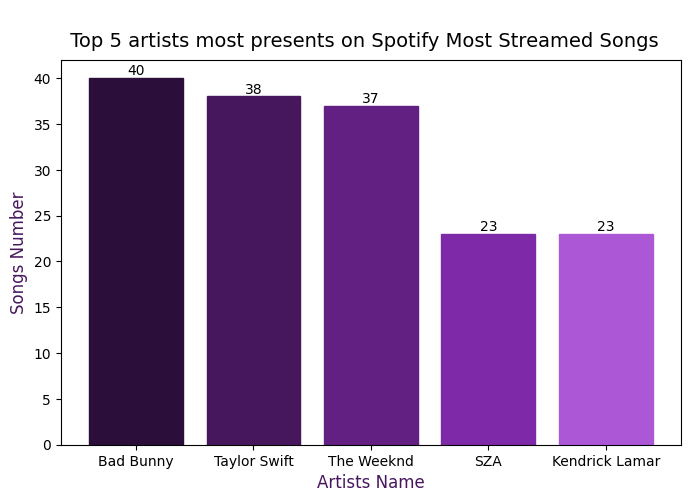

In [68]:
# Graphs to visualize

fig = plt.figure(figsize=(8,5))
ax = fig.subplots()
bars = ax.bar(x,y, color=('#9932CC'), edgecolor=('#882EB6'))

# Colors to bars 

color_bar = ['#2B0E39', '#47175E', '#622083', '#7E29A8', '#AC57D6']

for i in range(len(color_bar)):
    bars[i].set_color(color_bar[i])

# Titles and texts

fig.suptitle('\n Top 5 artists most presents on Spotify Most Streamed Songs', fontsize= 14)
ax.set_xlabel('Artists Name', fontsize = 12, color=('#47175E'))
ax.set_ylabel('Songs Number',fontsize= 12, color=('#47175E'))

plt.text('Bad Bunny',40, '40', ha= 'center', va='bottom')
plt.text('Taylor Swift',38, '38', ha= 'center', va='bottom')
plt.text('The Weeknd',37, '37', ha= 'center', va='bottom')
plt.text('SZA',23, '23', ha= 'center', va='bottom')
plt.text('Kendrick Lamar',23, '23', ha= 'center', va='bottom')

plt.show()

In [69]:
# What was the top music of each year during the last decade?

year_stream = {}
song_year = {}

for i in range(len(data_list)):
        
    value = data_list[i]['streams']
    ver = 1
    text_problem = 'abcdefghijklmnopqrstuvwxyz'
    
    for j in range(len(text_problem)):

        if(text_problem[j] in value):
            ver = 0
    
    if(ver):

        if (data_list[i]['released_year'] not in year_stream.keys()):
            year_stream[data_list[i]['released_year']] = value
            song_year[data_list[i]['released_year']] = data_list[i]['track_name']

        elif (data_list[i]['released_year'] in year_stream.keys() and int(value) > int(year_stream[data_list[i]['released_year']])):
            year_stream[data_list[i]['released_year']] = value
            song_year[data_list[i]['released_year']] = data_list[i]['track_name']



ord_year = dict(sorted(year_stream.items()))
ord_song = dict(sorted(song_year.items()))


x_1 = []
y_1 = []
decade = ['2013','2014','2015','2016','2017','2017','2018','2019','2020','2021','2022','2023']

for item in ord_song:
    if(item in decade):
        x_1.append(int(year_stream[item]))
        y_1.append(ord_song[item] + ' ('+ item +')')

Text(0, 0.5, 'Track Name')

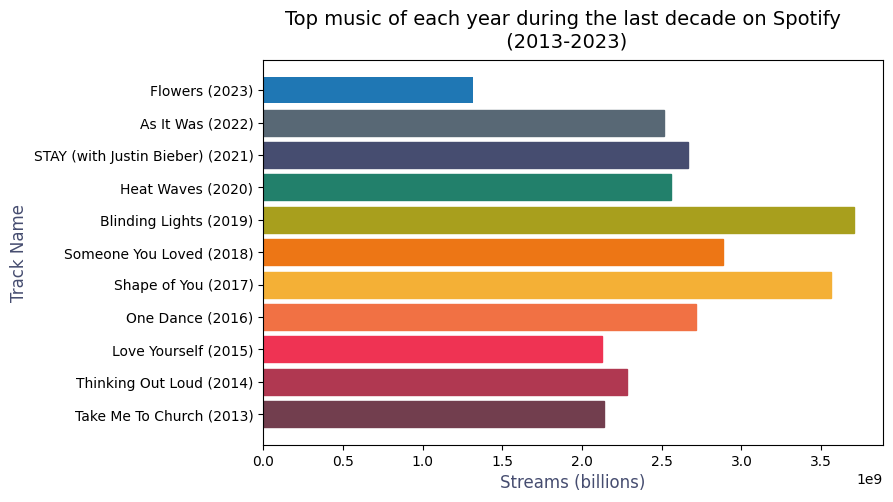

In [ ]:
# Graphs to visualize

fig = plt.figure(figsize=(8,5))
ax = fig.subplots()
bars = ax.barh(y_1,x_1)

# Colors to bars 

color_bar = ['#723e4e', '#b03851', '#ef3353', '#f17144', '#f4b036', '#ed7615', '#a89f1d', '#22806b', '#464d70','#586875']

for i in range(len(color_bar)):
    bars[i].set_color(color_bar[i])

# Titles and texts

fig.suptitle('Top music of each year during the last decade on Spotify\n (2013-2023)', fontsize= 14)
ax.set_xlabel('Streams (billions)', fontsize = 12, color=('#464d70'))
ax.set_ylabel('Track Name',fontsize= 12, color=('#464d70'))

plt.show()